<a href="https://colab.research.google.com/github/Eliascc5/FlowerRecognition-with-ResNet50/blob/main/flower_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from tensorflow.keras.layers import Conv2D, Flatten , Dense , MaxPool2D , BatchNormalization , GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input, decode_predictions 
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential , Model , load_model
import numpy as np
import matplotlib.pyplot as plt


**Vérification si tensorflow a pu détecter notre GPU**

https://www.tensorflow.org/install/gpu?hl=sl


In [8]:
import tensorflow.compat.v1 as tf        #compatibilite version 1
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print("-------------------------------")

import tensorflow as tf  
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print("-------------------------------")

tf.test.gpu_device_name()

Device mapping: no known devices.
-------------------------------
Num GPUs Available:  0
-------------------------------


''

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Dataset from : https://www.kaggle.com/alxmamaev/flowers-recognition

Le dataset a été divisé en 60% train 20% test 20%validation

In [5]:
train_path = r'/content/gdrive/MyDrive/ColabNotebooks/ResNet50_flowersRecognition/splited/train'
test_path = r'/content/gdrive/MyDrive/ColabNotebooks/ResNet50_flowersRecognition/splited/test'
val_path = r'/content/gdrive/MyDrive/ColabNotebooks/ResNet50_flowersRecognition/splited/val'

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [164]:
train_Batches = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_Batches.flow_from_directory(
        directory = train_path,
        target_size = (224, 224), 
        batch_size = 32,
        class_mode ='categorical',
        subset='training')

Found 2588 images belonging to 5 classes.


In [10]:
val_Batches = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_generator = val_Batches.flow_from_directory(
        directory = val_path,
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'categorical')

Found 860 images belonging to 5 classes.


In [87]:
test_Batches = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_Batches.flow_from_directory(
        directory = test_path,
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'categorical',
        shuffle = False)

Found 869 images belonging to 5 classes.


In [88]:
X_test , Y_test = test_generator.next()
X_train, Y_train = train_generator.next()

print("Number of classes: ", train_generator.num_classes)
print("Labels: ", train_generator.labels)

Number of classes:  5
Labels:  [0 0 0 ... 4 4 4]


**On affiche les premières 25 images du training dataset**

In [56]:
def plotImages(images_arr, n=25):

  #Fonction pour l'affichage de plusieurs images

  plt.figure(figsize=(20,20))
  for i in range(n):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images_arr[i])
  plt.show()

def plotImage(images_arr):
    #Fonction pour l'affichage de une seule image

    fig, axes = plt.subplots(1, 1, figsize=(5,5))
    axes.imshow(images_arr)
    axes.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

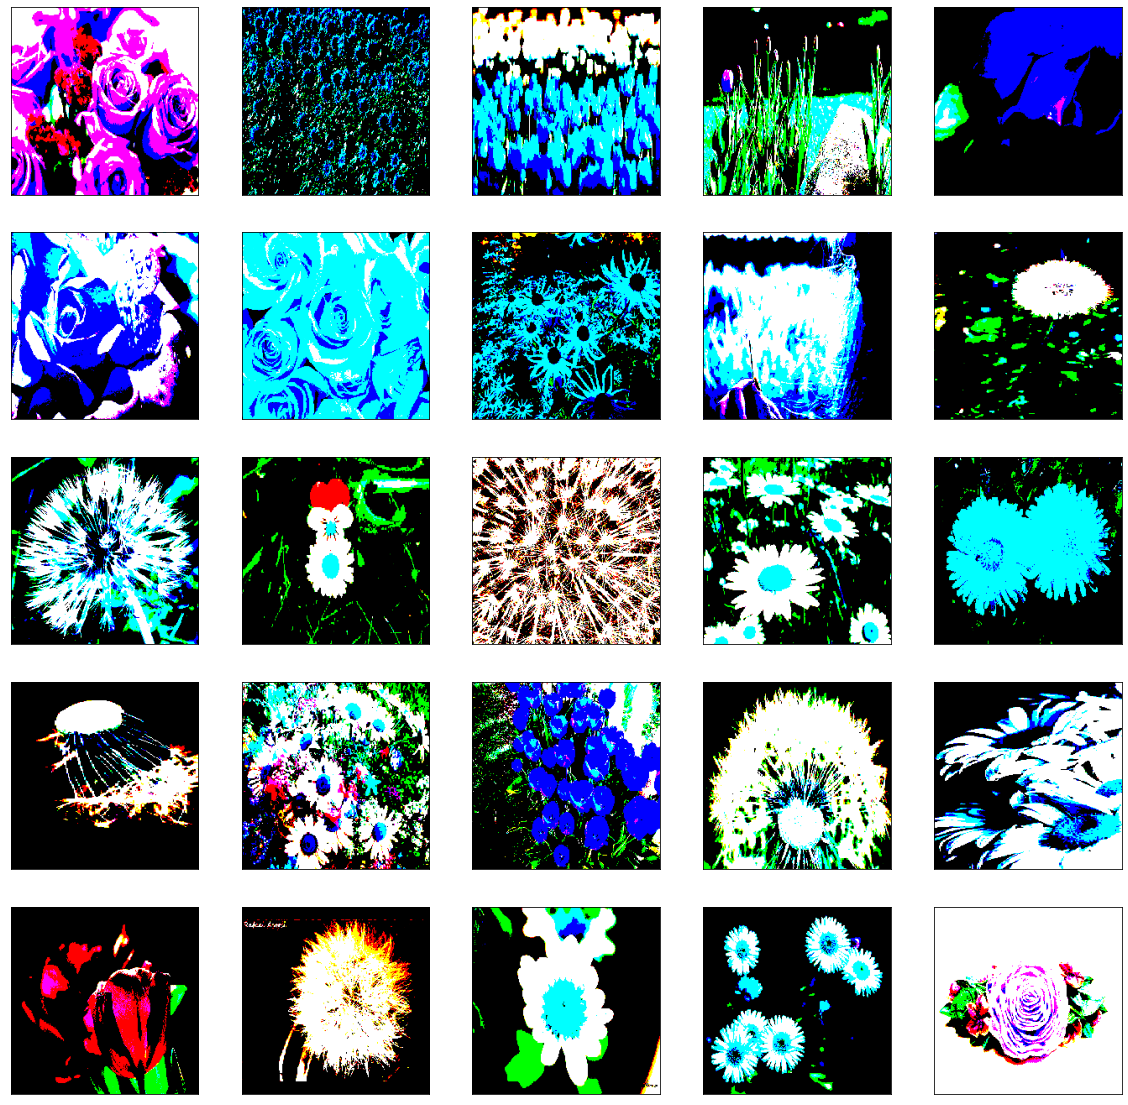

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [57]:
#Plot images from training dataset
n = 25 #Cantité des images à afficher (max 50)
plotMatrix(X_train, n)
#Labels for training dataset
print(Y_train)

**Création du modèle : ResNet50 (Residual NETWORK)**

In [12]:
base_model = ResNet50(include_top=False, weights='imagenet')

'''
Parametres:
include_top : whether to include the fully-connected layer at the top of the network.
weights : one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
'''

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation ='relu')(x)

output = Dense(train_generator.num_classes, activation = 'softmax')(x)

model = Model(base_model.input, output)

print(model.summary(), '\n')

Paper reference :  https://arxiv.org/abs/1512.03385

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

**Training**

In [ ]:
model.fit(x = train_generator,validation_data = validation_generator, epochs = 5)

In [ ]:
test_loss , test_acc = model.evaluate(test_generator,verbose=2)

869/869 - 423s - loss: 0.3553 - accuracy: 0.9056


**Stockage du modèle entrainé**

In [ ]:
model.save(r'/content/gdrive/MyDrive/ColabNotebooks/ResNet50_flowersRecognition/modelFlower.h5')
print('Saved model to disk!')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Saved model to disk!




---





**Chargement du modèle entraîné**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = load_model('/content/gdrive/MyDrive/ColabNotebooks/ResNet50_flowersRecognition/modelFlower.h5')

# Show the model architecture
new_model.summary()

In [62]:
test_loss , test_acc = new_model.evaluate(test_generator,verbose=2)

869/869 - 184s - loss: 0.3553 - accuracy: 0.9056


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


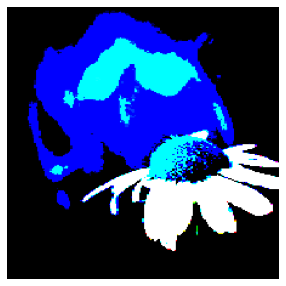

Labels test set :  [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [174]:
plotImage(X_test[0])
print("Labels test set : ", Y_test)

In [175]:
categories = ['daisy','dandelion','rose','sunflower','tulip']

In [176]:
predictions = new_model.predict(X_test)

In [ ]:
test_generator.filenames

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

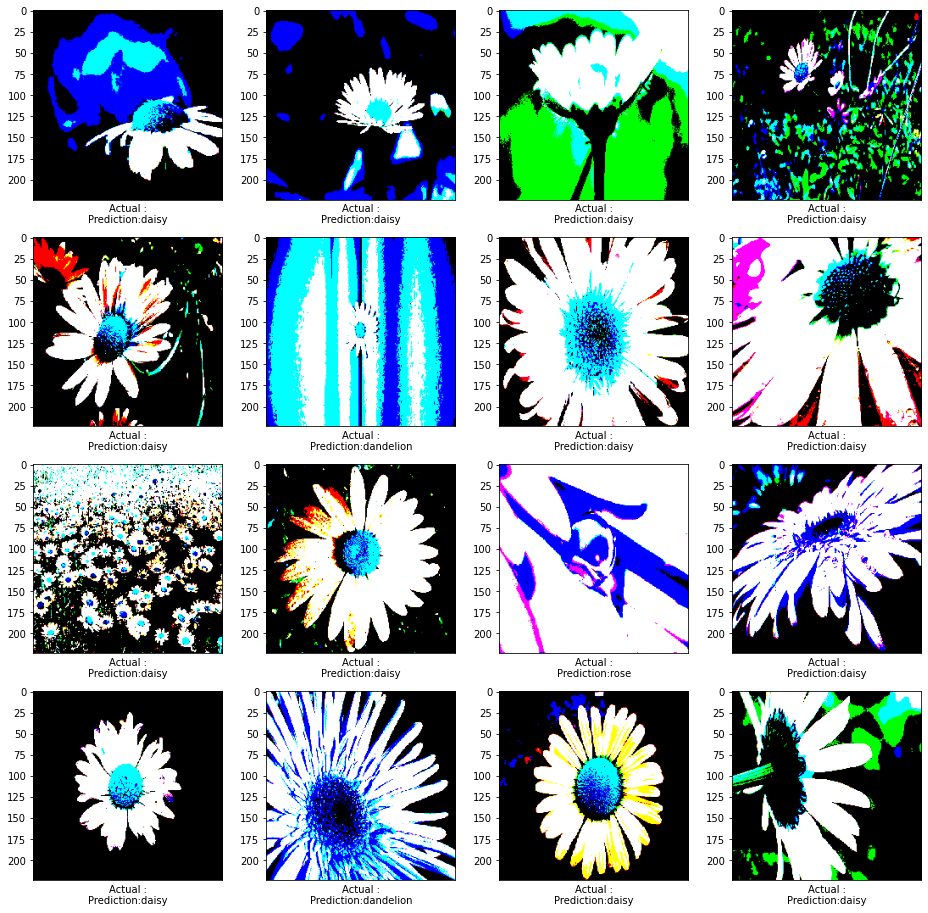

In [150]:
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_test[i])
  plt.xlabel('Actual :'+'\n' +'Prediction:'+ categories[np.argmax(predictions[i])])
  plt.xticks([])
plt.show()



In [ ]:
nb_samples = len(test_generator)
print ("Number of samples in test set : ",nb_samples)
X_test[0][0]